In [45]:
import pandas as pd

In [46]:
df = pd.read_csv('car data.csv')

In [47]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [48]:
df.shape

(301, 9)

In [49]:
# We can see that there are 4 categorical features:
# they are: Fuel_Type, Sellar_Type, Transmission, Owner

#Let's find out all the unique values of all these categorical features:


print("Unique values in seller_type: ", df['Seller_Type'].unique())
print("Unique values in Fuel type: ", df['Fuel_Type'].unique())
print("Unique values in Transmission: ", df['Transmission'].unique())
print("Unique values in Owner: ", df['Owner'].unique())

Unique values in seller_type:  ['Dealer' 'Individual']
Unique values in Fuel type:  ['Petrol' 'Diesel' 'CNG']
Unique values in Transmission:  ['Manual' 'Automatic']
Unique values in Owner:  [0 1 3]


In [50]:
#check missing values:

df.isnull().sum() #shows that there are no null values.

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [51]:
# We will now create a new derived feature from the "Year" column to find out the number of years, how old is the car.


df['No_of_years'] = 2020 - df['Year']

In [52]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [53]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'No_of_years']]

In [54]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [55]:
final_dataset.drop(['Year'], axis = 1, inplace = True)

/Users/yudi/opt/anaconda3/envs/mlmodels/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [59]:
## Now we will be dealing with the categorical values:
## we will use getdummies provided by pandas.

final_dataset = pd.get_dummies(final_dataset, drop_first = True) #this will convert all the categorical fields into one hot encoding.

In [61]:
final_dataset.head() #Notice that CNG is not there, basically if Diesel and Petrol are both zero, it means CNG is hot.

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [62]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


this is the top_corr_feature Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_of_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')


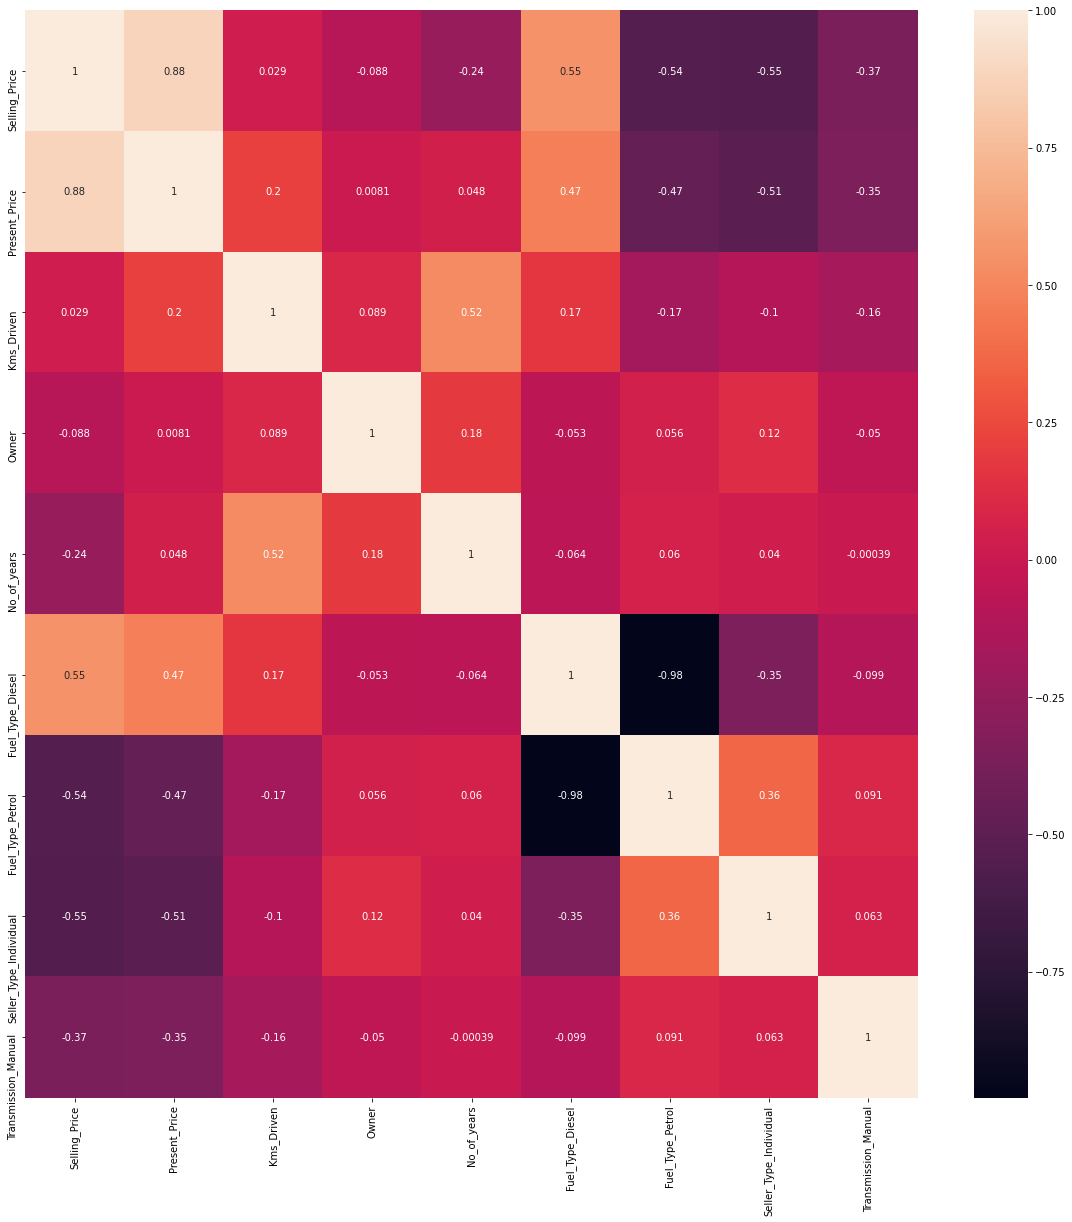

In [73]:
import matplotlib.pyplot as plt

corrmat = final_dataset.corr()
top_corr_features = corrmat.index

plt.figure(figsize = (20, 20))
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True)

In [76]:
X = final_dataset.iloc[:, 1:] # Independent feature
y = final_dataset.iloc[:, 0] # Dependent feature

<AxesSubplot:>

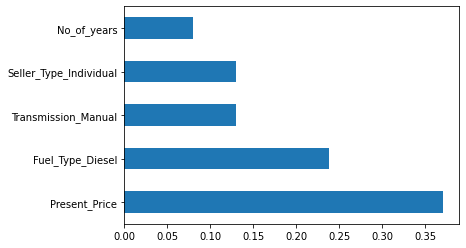

In [83]:
#Finding out important features:

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

#Let's plot the feature importances for a better visualization.

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest().plot(kind = 'barh')

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2)

In [85]:
X_train.shape

(240, 8)